# Tarea 2

Jairo Saul Diaz Soto

Dr. Joaquin Peña Acevedo

Optimizacion I

2024 / 02 / 11


---
## Ejercicio 1

In [2]:
## Importando las librerias
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import os

### 1.- Funcion para extraer el sistema del archivo NPZ y obtener el minimizador

In [3]:
def sis_npz(npz_path):
    file = np.load(npz_path)
    A = file['arr_0']
    b = file['arr_1']
    try:
        L = sp.linalg.cholesky(A, lower=True)
        y = sp.linalg.solve_triangular(L, b, lower=True)
        x = sp.linalg.solve_triangular(L.T, y, lower=False)
        return A, b, x
    except np.linalg.LinAlgError:
        print("La matriz no es definida positiva.")
        return A, b, None

In [4]:
## Obteniendo los sistemas
paths = ['datosTarea02/matA_vecb1.npz',
         'datosTarea02/matA_vecb2.npz','datosTarea02/matA_vecb3.npz',
         'datosTarea02/matA_vecb4.npz']
A1, b1, x1 = sis_npz(paths[0])
A2, b2, x2 = sis_npz(paths[1])
A3, b3, x3 = sis_npz(paths[2])
A4, b4, x4 = sis_npz(paths[3])

---
### 2.- Funcion q(x)

In [5]:
def f_q(x, A, x_m):
    return 0.5*(x-x_m)@(A@(x-x_m))
    

---
### 3.- Funcion para estimar el numero de iteraciones

In [6]:
def k_iterator(x0, A, x_m, tol):
    eigns = np.sort(sp.linalg.eigvals(A))
    c = (eigns[-1]-eigns[0]) / (eigns[-1]+eigns[0])
    k = 1
    while pow(c, k)*np.sqrt(2*f_q(x0, A, x_m)) > tol:
        k+=1
    return c, k

---
### 4.- Estimando los valores

In [7]:
eps_m = np.finfo(float).eps
tol = np.sqrt(eps_m)

In [8]:
if x1 is not None:
    n = len(b1)
    x0 = np.full((n,), 10)
    c, k = k_iterator(x0, A1, x1, tol)
    print('El tamanio del arreglo es: ',n)
    print('El valor de la funcion q en el punto inicial es:', f_q(x0, A1, x1))
    print('El estimado de iteraciones es: ', k)
    print('El valor de c es:', c)
    

El tamanio del arreglo es:  2
El valor de la funcion q en el punto inicial es: 1113.15
El estimado de iteraciones es:  54
El valor de c es: (0.6666666666666666+0j)


In [9]:
if x2 is not None:
    n = len(b2)
    x0 = np.full((n,), 10)
    c, k = k_iterator(x0, A2, x2, tol)
    print('El tamanio del arreglo es: ',n)
    print('El valor de la funcion q en el punto inicial es:', f_q(x0, A2, x2))
    print('El estimado de iteraciones es: ', k)
    print('El valor de c es:', c)
    

El tamanio del arreglo es:  10
El valor de la funcion q en el punto inicial es: 2658.825
El estimado de iteraciones es:  150
El valor de c es: (0.8610359125293416+0j)


In [10]:
if x3 is not None:
    n = len(b3)
    x0 = np.full((n,), 10)
    c, k = k_iterator(x0, A3, x3, tol)
    print('El tamanio del arreglo es: ',n)
    print('El valor de la funcion q en el punto inicial es:', f_q(x0, A3, x3))
    print('El estimado de iteraciones es: ', k)
    print('El valor de c es:', c)
    

El tamanio del arreglo es:  100
El valor de la funcion q en el punto inicial es: 18134.269999999997
El estimado de iteraciones es:  8
El valor de c es: (0.04175532669469642+0j)


In [11]:
if x4 is not None:
    n = len(b4)
    x0 = np.full((n,), 10)
    c, k = k_iterator(x0, A4, x4, tol)
    print('El tamanio del arreglo es: ',n)
    print('El valor de la funcion q en el punto inicial es:', f_q(x0, A4, x4))
    print('El estimado de iteraciones es: ', k)
    print('El valor de c es:', c)
    

El tamanio del arreglo es:  500
El valor de la funcion q en el punto inicial es: 543978.79
El estimado de iteraciones es:  276
El valor de c es: (0.913211447142638+0j)


---
## Ejercicio 2

### 1.- Funcion de descenso maximo con paso de tamanio exacto

In [12]:
def des_max_exact(A, b, x0, tol, NMax):
    x = np.copy(x0)
    for k in range(NMax):
        g = (A@x) - b
        alpha = (g@g) / (g@A@g)
        if np.linalg.norm(alpha*g) < tol:
            return x, k, True
        x = x - (alpha*g)
    return x, NMax, False

---
### 2.- Funcion cuadratica

In [13]:
def f_cuad(A, b, x):
    return (0.5*x@A@x) - (b@x)

---
### 3.- Probando el algoritmo

In [14]:
if x1 is not None:
    n = len(b1)
    x0 = np.full((n,), 10)
    c, kmax = k_iterator(x0, A1, x1, tol)
    print('El tamanio del arreglo es: ',n)

x, k, tb = des_max_exact(A1, b1, x0, tol, kmax)
print('El valor de la funcion en el punto inicial es: ',f_cuad(A1, b1, x0))
if tb:
    print('El optimo se alcanzo en ', k, ' iteraciones')
else:
    print('No se alcanzo el optimo tras ', k, ' iteraciones')
print('El valor de la funcion en el punto optimo es: ',f_cuad(A1, b1, x))
print('La norma de la diferencia es: ', np.linalg.norm(x - x1))
if n <= 6:
    print('El punto que optimiza la funcion es: ', x)
else:
    print('El punto que optimiza la funcion es: ', x[:3], x[-3:])

El tamanio del arreglo es:  2
El valor de la funcion en el punto inicial es:  1110.0
El optimo se alcanzo en  5  iteraciones
El valor de la funcion en el punto optimo es:  -3.1500000000000004
La norma de la diferencia es:  1.4608710853849743e-09
El punto que optimiza la funcion es:  [-0.3 -0.8]


In [15]:
if x2 is not None:
    n = len(b2)
    x0 = np.full((n,), 10)
    c, kmax = k_iterator(x0, A2, x2, tol)
    print('El tamanio del arreglo es: ',n)

x, k, tb = des_max_exact(A2, b2, x0, tol, kmax)
print('El valor de la funcion en el punto inicial es: ',f_cuad(A2, b2, x0))
if tb:
    print('El optimo se alcanzo en ', k, ' iteraciones')
else:
    print('No se alcanzo el optimo tras ', k, ' iteraciones')
print('El valor de la funcion en el punto optimo es: ',f_cuad(A2, b2, x))
print('La norma de la diferencia es: ', np.linalg.norm(x - x2))
if n <= 6:
    print('El punto que optimiza la funcion es: ', x)
else:
    print('El punto que optimiza la funcion es: ', x[:3], x[-3:])

El tamanio del arreglo es:  10
El valor de la funcion en el punto inicial es:  2626.0
El optimo se alcanzo en  105  iteraciones
El valor de la funcion en el punto optimo es:  -32.824999999999996
La norma de la diferencia es:  6.309047663608029e-08
El punto que optimiza la funcion es:  [0.99999999 0.99999999 1.00000003] [0.99999997 1.00000002 1.        ]


In [16]:
if x3 is not None:
    n = len(b3)
    x0 = np.full((n,), 10)
    c, kmax = k_iterator(x0, A3, x3, tol)
    print('El tamanio del arreglo es: ',n)

x, k, tb = des_max_exact(A3, b3, x0, tol, kmax)
print('El valor de la funcion en el punto inicial es: ',f_cuad(A3, b3, x0))
if tb:
    print('El optimo se alcanzo en ', k, ' iteraciones')
else:
    print('No se alcanzo el optimo tras ', k, ' iteraciones')
print('El valor de la funcion en el punto optimo es: ',f_cuad(A3, b3, x))
print('La norma de la diferencia es: ', np.linalg.norm(x - x3))
if n <= 6:
    print('El punto que optimiza la funcion es: ', x)
else:
    print('El punto que optimiza la funcion es: ', x[:3], x[-3:])

El tamanio del arreglo es:  100
El valor de la funcion en el punto inicial es:  17984.4
El optimo se alcanzo en  7  iteraciones
El valor de la funcion en el punto optimo es:  -149.86999999999998
La norma de la diferencia es:  1.2326875060548515e-09
El punto que optimiza la funcion es:  [-1. -1. -1.] [-1. -1. -1.]


In [17]:
if x4 is not None:
    n = len(b4)
    x0 = np.full((n,), 10)
    c, kmax = k_iterator(x0, A4, x4, tol)
    print('El tamanio del arreglo es: ',n)

x, k, tb = des_max_exact(A4, b4, x0, tol, kmax)
print('El valor de la funcion en el punto inicial es: ',f_cuad(A4, b4, x0))
if tb:
    print('El optimo se alcanzo en ', k, ' iteraciones')
else:
    print('No se alcanzo el optimo tras ', k, ' iteraciones')
print('El valor de la funcion en el punto optimo es: ',f_cuad(A4, b4, x))
print('La norma de la diferencia es: ', np.linalg.norm(x - x4))
if n <= 6:
    print('El punto que optimiza la funcion es: ', x)
else:
    print('El punto que optimiza la funcion es: ', x[:3], x[-3:])

El tamanio del arreglo es:  500
El valor de la funcion en el punto inicial es:  543542.6000000002
El optimo se alcanzo en  117  iteraciones
El valor de la funcion en el punto optimo es:  -436.1899999999998
La norma de la diferencia es:  1.0879849896644901e-07
El punto que optimiza la funcion es:  [ 1. -1.  1.] [-0.99999999  0.99999999 -1.        ]


---
### 4.- Comentarios

Se pudo corroborar que las estimaciones sirvieron como una excelente cota superior ya que todos los sistemas alcanzaron la convergencia en un numero menor al estimado

---
## Ejercicio 3

### 1.- Funcion de descenso con seccion dorada

In [18]:
## Metodo de seccion dorada
def golden_section_s(fnc, xl, xu, TOL, NMax):
    rho = (np.sqrt(5) - 1) / 2
    for k in range(NMax):
        b = rho * (xu-xl)
        x1 = xu - b
        x3 = xl + b
        if fnc(x1) < fnc(x3):
            xu = x3
            xk = x1
        if fnc(x1) > fnc(x3):
            xl = x1
            xk = x3
        if xu - xl < TOL:
            return xk

    return xk
    
def desc_max_gsect(f_func, grad_fun, x0, tol1, tol2, NMax, NMax_gsect):
    x = np.copy(x0)
    lst = []
    for k in range(NMax):
        if len(x) == 2:
            lst.append(np.copy(x))
        g = grad_fun(x)
        p = -g
        phi = lambda a: f_func(x + (a*p))
        amin = golden_section_s(phi, 0, 1, tol2, NMax_gsect)
        if np.linalg.norm(amin*p) < tol1:
            return x, k, True, lst
        x = x + (amin*p)
    return x, k, False, lst
    

---
### 2.- Definiendo las funciones a probar

In [19]:
def himmelblau(x):
    return ((x[0]**2) + x[1] - 11)**2 + (x[0] + (x[1]**2) - 7)**2

def himmelblau_grad(x):
    return np.array([(4*x[0]*((x[0]**2) + x[1] - 11)) + (2*(x[0] + (x[1]**2) - 7)),
                     (2*((x[0]**2) + x[1] - 11)) + (4*x[1]*(x[0] + (x[1]**2) - 7))])

def bale(x):
    return (1.5 - x[0] + (x[0]*x[1]))**2 + (2.25 - x[0] + (x[0]*x[1]**2))**2 + (2.625 - x[0] + (x[0]*x[1]**3))**2
    
def bale_grad(x):
    return np.array([ (2*(x[1] - 1) * (1.5 - x[0] + (x[0]*x[1]))) + (2*(x[1]**2 - 1)*(2.25 - x[0] + (x[0]*x[1]**2))) + (2*(x[1]**3 - 1)*(2.625 - x[0] + (x[0]*x[1]**3))), 
                    (2*x[0]*(1.5 - x[0] + (x[0]*x[1]))) + (4*(x[0]*x[1])*(2.25 - x[0] + (x[0]*x[1]**2))) + (6*(x[0]*x[1]**2)*(2.625 - x[0] + (x[0]*x[1]**3)))])

def rosenbrock(x):
    n = len(x)
    res = 0
    for k in range(n-1):
        res += (100 * (x[k+1] - (x[k]**2))**2 ) + (1-x[k])**2
    return res

def rosenbrock_grad(x):
    gradient = np.zeros_like(x)
    n = len(x)
    for i in range(n-1):
        gradient[i] += (-400*x[i]*(x[i+1] - (x[i]**2))) - (2*(1-x[i]))
        gradient[i+1] += (200)*(x[i+1] - (x[i]**2))
    return gradient
        
    

---
### 2.- Probando el metodo

In [20]:
def contornosFnc2D(fncf, xleft, xright, ybottom, ytop, levels, puntos=None):
    # Crea una discretización uniforme del intervalo [xleft, xright]
    ax = np.linspace(xleft, xright, 250)
    # Crea una discretización uniforme del intervalo [ybottom, ytop]
    ay = np.linspace(ybottom, ytop, 200)
    # La matriz mX que tiene las abscisas
    mX, mY = np.meshgrid(ax, ay)
    # Se crea el arreglo mZ con los valores de la función en cada nodo
    mZ = mX.copy()
    for i, y in enumerate(ay):
        for j, x in enumerate(ax):
            mZ[i, j] = fncf(np.array([x, y]))
    
    # Grafica de las curvas de nivel
    fig, ax = plt.subplots()
    CS = ax.contour(mX, mY, mZ, levels, cmap='Wistia')
    
    # Grafica los puntos y conecta la secuencia con líneas
    if puntos is not None:
        puntos = np.array(puntos)
        ax.plot(puntos[:, 0], puntos[:, 1], color='red', marker='o', linestyle='-', linewidth=2, label='Secuencia de puntos')
    
    ax.legend()  # Muestra la leyenda si se han graficado puntos
    plt.show()

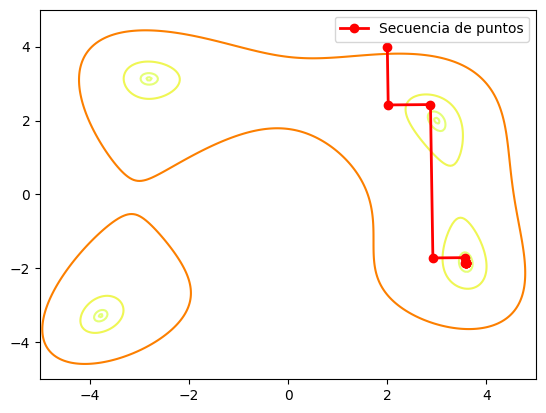

In [21]:
## Primer Punto fnc1
x0 = np.array([2,4])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = tol
NMax = 10000
NMax_gs = 200
xk, k, bl, lst = desc_max_gsect(himmelblau, himmelblau_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(himmelblau, -5, 5, -5, 5, [0.1, 1, 10, 100 ], lst)

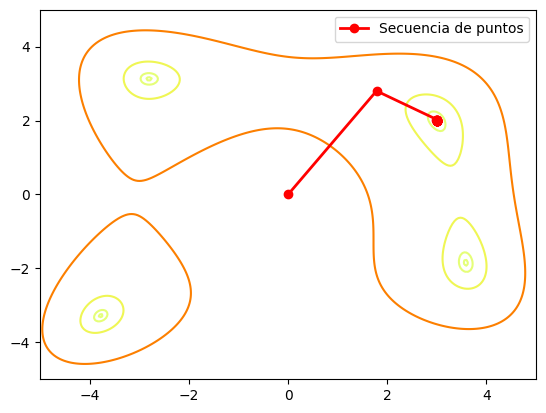

In [22]:
## Segundo Punto fnc1
x0 = np.array([0,0])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = tol
NMax = 10000
NMax_gs = 200
xk, k, bl, lst = desc_max_gsect(himmelblau, himmelblau_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(himmelblau, -5, 5, -5, 5, [0.1, 1, 10, 100 ], lst)

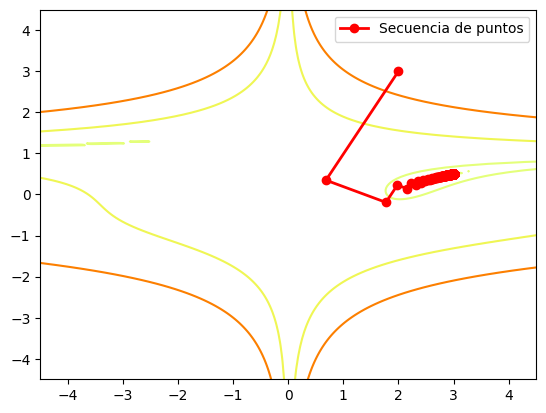

array([2.99999913, 0.49999978])

In [23]:
## Primer Punto fnc2
x0 = np.array([2,3])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = tol
NMax = 10000
NMax_gs = 200
xk, k, bl, lst = desc_max_gsect(bale, bale_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(bale, -4.5, 4.5, -4.5, 4.5, [0.01, 1, 100, 1000 ], lst)
xk

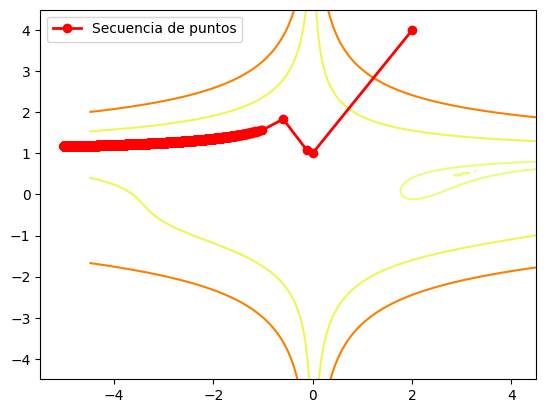

array([-5.01373615,  1.16974   ])

In [24]:
## Segundo Punto fnc2
x0 = np.array([2,4])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = tol
NMax = 10000
NMax_gs = 200
xk, k, bl, lst = desc_max_gsect(bale, bale_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(bale, -4.5, 4.5, -4.5, 4.5, [0.01, 1, 100, 1000 ], lst)
xk

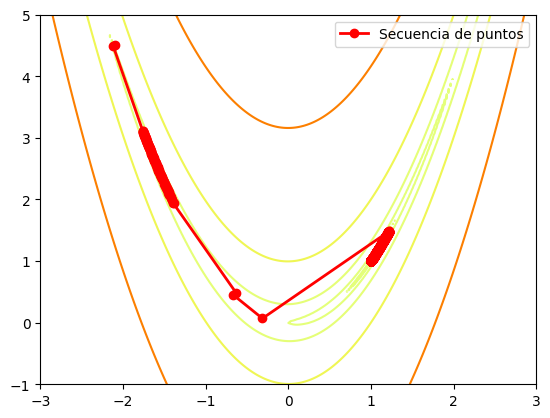

array([1.00000513, 1.00001031])

In [25]:
## Primer Punto fnc3
x0 = np.array([-2.1,4.5])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = tol
NMax = 10000
NMax_gs = 200
xk, k, bl, lst = desc_max_gsect(rosenbrock, rosenbrock_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(rosenbrock, -3, 3, -1, 5, [0.001, 0.01, 0.1, 1, 10, 100, 1000 ], lst)
xk

In [26]:
k

6697

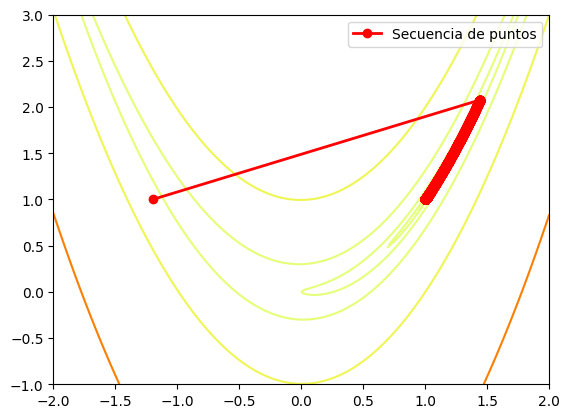

array([1.0000062 , 1.00001244])

In [27]:
## Segundo Punto fnc3
x0 = np.array([-1.2,1.0])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = tol
NMax = 25000
NMax_gs = 200
xk, k, bl, lst = desc_max_gsect(rosenbrock, rosenbrock_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(rosenbrock, -2, 2, -1, 3, [0.001, 0.01, 0.1, 1, 10, 100, 1000 ], lst)
xk

In [28]:
k

16189

---
### 3.- Relajando el algoritmo

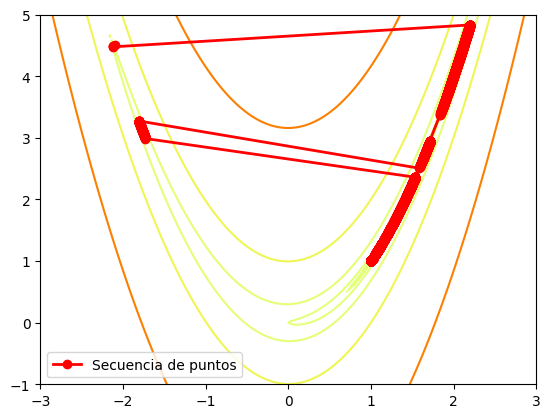

array([1.00000509, 1.00001017])

In [29]:
x0 = np.array([-2.1,4.5])
tol1 = np.sqrt(2) * pow(eps_m, 1/3)
tol2 = pow(eps_m, 1/4)
NMax = 15000
NMax_gs = 50
xk, k, bl, lst = desc_max_gsect(rosenbrock, rosenbrock_grad, x0, tol, tol2, NMax, NMax_gs)
contornosFnc2D(rosenbrock, -3, 3, -1, 5, [0.001, 0.01, 0.1, 1, 10, 100, 1000 ], lst)
xk

In [30]:
k

11158

### Comentario
En este caso, al relajar el algoritmo de seccion Dorada, no parece que haya habido ninguna mejora, ya que el algoritmo se vuelve muchisimo mas lento, o mas ruidoso, provocando que el algoritmo tarde muchas mas iteraciones en alcanzar el optimo.

---
## Ejercicio 4

Sea $f(x) = (x-1)^2$ con $x \in \mathbb{R}$ y generamos la secuencia

$$
x_{k+1} = x_k - \frac{\alpha}{2^k} f'(x_k)
$$
con $0<\alpha<1$, para obtener el minimizador de la funcion $f(x)$. ¿Tiene este algoritmo la propiedad de descenso, es decir, $f(x_{k+1})<f(x_k)$ a partir de cierto $k$? ¿Es el algoritmo globalmente convergiente?

### Solucion

Comenzamos evaluando la funcion en los puntos
$$
f(x_k) = (x_k -1)^2
$$
$$
f(x_{k+1}) = (x_k - \frac{\alpha}{2^k} f'(x_k) - 1)^2
$$

Tomamos la hipotesis como verdadera, entonces

$$
(x_k - \frac{\alpha}{2^k} f'(x_k) - 1)^2 < (x_k -1)^2
$$

Desarrollando

$$
x_k^2 + \left(\frac{\alpha}{2^k} f'(x_k)\right)^2 + 1 +2\left(\frac{\alpha}{2^k} f'(x_k) - x_k - x_k \frac{\alpha}{2^k} f'(x_k)\right) < x_k^2 -2x_k +1
$$

$$
\left(\frac{\alpha}{2^k} f'(x_k)\right)^2 + 2\frac{\alpha}{2^k} f'(x_k)(1-x_k) < 0
$$

Dado $f'(x_k) = 2(x_k-1)$, lo sustituimos

$$
4\left(\frac{\alpha}{2^k}\right)^2(x_k-1)^2 + 4 \frac{\alpha}{2^k}(x_k-1)(1-x_k) < 0
$$

Factorizando se tiene que

$$
4 \frac{\alpha}{2^k}(x_k-1)^2 \left(\frac{\alpha}{2^k} - 1\right) < 0
$$

De esta expresion se puede obtener que para que esto se negativo

$$\left(\frac{\alpha}{2^k} - 1\right) < 0$$

$$
\alpha < 2^k
$$

$$
k > \log_2{\alpha}
$$

Dado que $\max{\alpha} = 1$, entonces para cualquier k que cumpla

$$
k > \log_2{1}
$$

Es decir, $k>0$ cumple la condicion, entonces esto quiere decir que si se cumple con la condicion de descenso. Adicionalmente, derivado de que la condicion no depende explicitamente de las condiciones inciales, entonces se puede concluir ademas que es globalmente convergiente.